In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras import models
from keras import layers
import tensorflow as tf
import os
import os.path
from pathlib import Path
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.optimizers import RMSprop,Adam
import glob
from PIL import Image

# IGNORING UNNECESSARRY WARNINGS

In [6]:
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

 ## Create Paths for Folders

In [7]:
No_Data_Path = Path("Downloads/brain_tumor_dataset/no")
yes_Data_Path = Path("Downloads/brain_tumor_dataset/yes")


In [8]:
No_JPG_Path = list(No_Data_Path.glob(r"*.jpg")) 
Yes_JPG_Path = list(yes_Data_Path.glob(r"*.jpg"))

In [45]:
#Yes_JPG_Path

In [44]:
#No_JPG_Path

In [11]:
Yes_No_List = [*No_JPG_Path, *Yes_JPG_Path]


In [46]:
#Yes_No_List

In [13]:
Yes_No_List[50]

WindowsPath('Downloads/brain_tumor_dataset/no/N17.jpg')

In [14]:
os.path.split(Yes_No_List[0])  #Remove file name


('Downloads\\brain_tumor_dataset\\no', '10 no.jpg')

In [15]:
os.path.split(Yes_No_List[0])[0]   #Take only the folder path


'Downloads\\brain_tumor_dataset\\no'

In [16]:
os.path.split((os.path.split(Yes_No_List[0])[0]))[1]  #Extract only the last folder name


'no'

In [17]:
import os

JPG_Labels = [os.path.basename(os.path.dirname(x)) for x in Yes_No_List]
print(JPG_Labels[:5])    #dirname() → removes the file name  #basename() → gives just the folder name


['no', 'no', 'no', 'no', 'no']


In [18]:
set(JPG_Labels)

{'no', 'yes'}

In [19]:
print("NO COUNTING: ", JPG_Labels.count("no"))
print("YES COUNTING: ", JPG_Labels.count("yes"))

NO COUNTING:  91
YES COUNTING:  154


In [20]:
JPG_Path_Series = pd.Series(Yes_No_List,name="JPG").astype(str)
JPG_Category_Series = pd.Series(JPG_Labels,name="TUMOR_CATEGORY")

In [21]:
df = pd.concat([JPG_Path_Series, JPG_Category_Series], axis=1)
print(df.head())


                                          JPG TUMOR_CATEGORY
0  Downloads\brain_tumor_dataset\no\10 no.jpg             no
1  Downloads\brain_tumor_dataset\no\11 no.jpg             no
2  Downloads\brain_tumor_dataset\no\12 no.jpg             no
3  Downloads\brain_tumor_dataset\no\13 no.jpg             no
4  Downloads\brain_tumor_dataset\no\14 no.jpg             no


In [22]:
JPG_Path_Series

0      Downloads\brain_tumor_dataset\no\10 no.jpg
1      Downloads\brain_tumor_dataset\no\11 no.jpg
2      Downloads\brain_tumor_dataset\no\12 no.jpg
3      Downloads\brain_tumor_dataset\no\13 no.jpg
4      Downloads\brain_tumor_dataset\no\14 no.jpg
                          ...                    
240     Downloads\brain_tumor_dataset\yes\Y95.jpg
241     Downloads\brain_tumor_dataset\yes\Y96.jpg
242     Downloads\brain_tumor_dataset\yes\Y97.JPG
243     Downloads\brain_tumor_dataset\yes\Y98.JPG
244     Downloads\brain_tumor_dataset\yes\Y99.JPG
Name: JPG, Length: 245, dtype: object

In [23]:
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,JPG,TUMOR_CATEGORY
0,Downloads\brain_tumor_dataset\no\No16.jpg,no
1,Downloads\brain_tumor_dataset\yes\Y19.JPG,yes
2,Downloads\brain_tumor_dataset\yes\Y252.jpg,yes
3,Downloads\brain_tumor_dataset\no\No19.jpg,no
4,Downloads\brain_tumor_dataset\yes\Y170.JPG,yes
5,Downloads\brain_tumor_dataset\yes\Y160.JPG,yes
6,Downloads\brain_tumor_dataset\yes\Y7.jpg,yes
7,Downloads\brain_tumor_dataset\no\50 no.jpg,no
8,Downloads\brain_tumor_dataset\no\20 no.jpg,no
9,Downloads\brain_tumor_dataset\no\39 no.jpg,no


Text(0.5, 1.0, 'no')

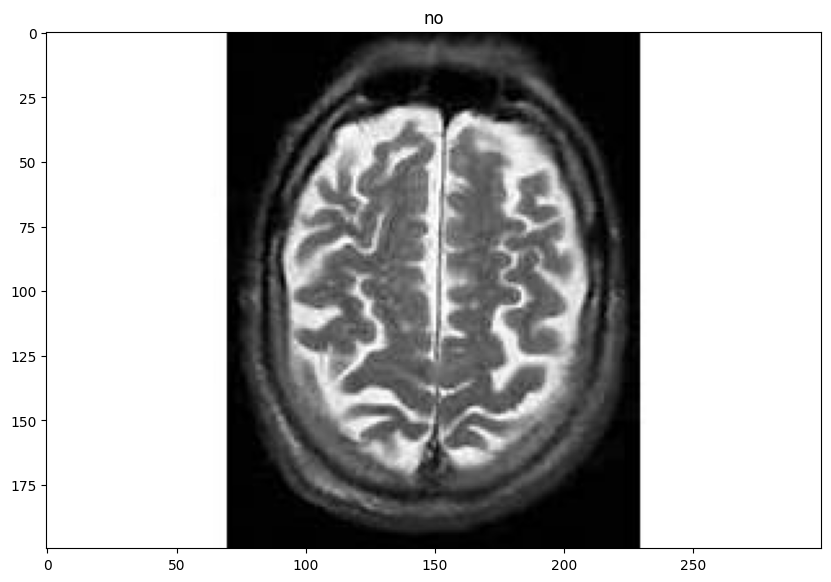

In [24]:
figure = plt.figure(figsize=(10,10))
plt.imshow(plt.imread(df["JPG"][0]))
plt.title(df["TUMOR_CATEGORY"][0])

In [25]:
# See what unique values are in the label column
print(df['TUMOR_CATEGORY'].unique())


['no' 'yes']


Number of YES images to plot: 25


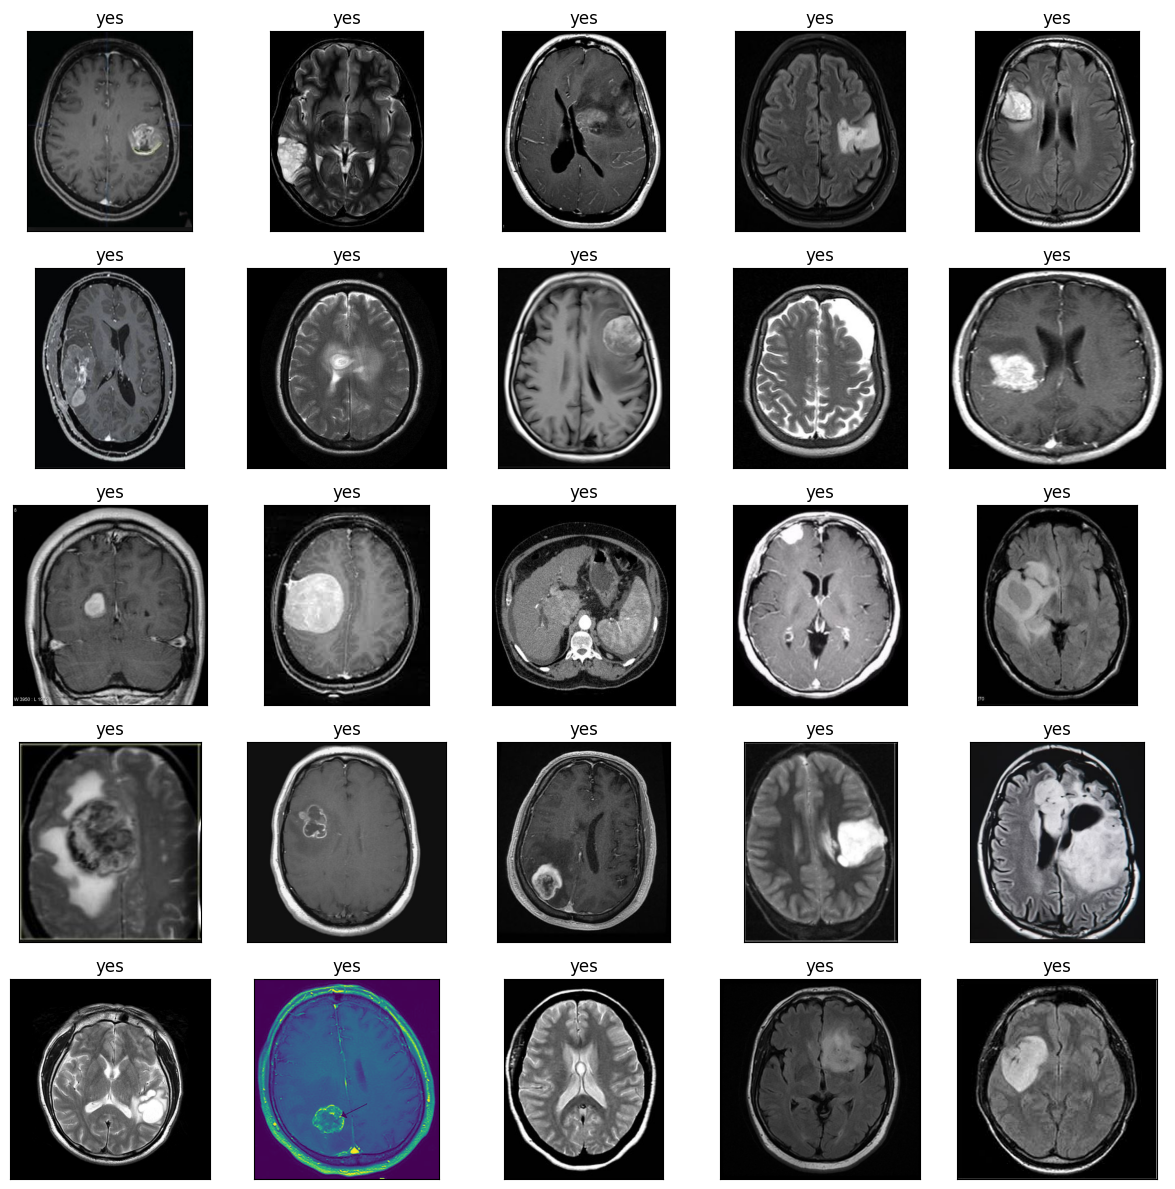

In [26]:

# Filter only YES images
yes_images_df = df[
df['TUMOR_CATEGORY'].astype(str).str.strip().str.lower() == 'yes'
]

# Select only the first 25 images (or fewer if less than 25 exist)
yes_images_25 = yes_images_df.head(25)

#  Check how many images we have
num_images = len(yes_images_25)
print("Number of YES images to plot:", num_images)

# Set grid size (5x5)
rows, cols = 5, 5

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12),
                         subplot_kw={'xticks': [], 'yticks': []})

# Flatten axes array for easy iteration
axes = axes.flat

# Plot images
for i, ax in enumerate(axes):
    if i < num_images:
        img_path = yes_images_25['JPG'].iloc[i]
        ax.imshow(plt.imread(img_path))
        ax.set_title(yes_images_25['TUMOR_CATEGORY'].iloc[i])
    else:
        ax.axis('off')  # hide empty axes if less than 25 images

plt.tight_layout()
plt.show()


Number of NO images to plot: 25


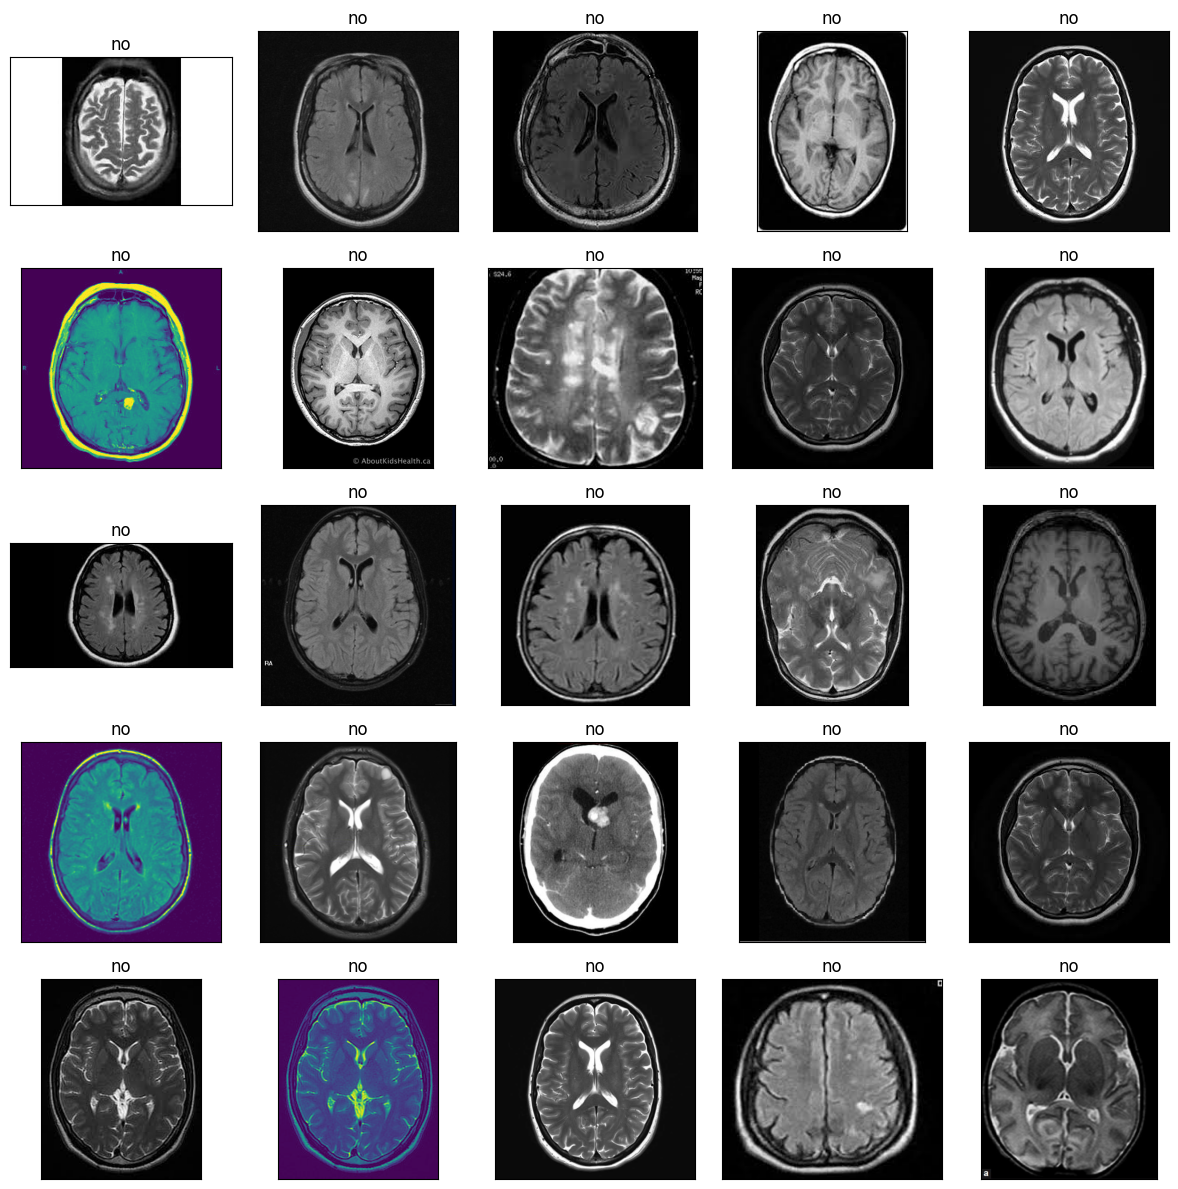

In [27]:
# Filter only NO images
no_images_df = df[
    df['TUMOR_CATEGORY'].astype(str).str.strip().str.lower() == 'no'
]

# Select only the first 25 images (or fewer if less than 25 exist)
no_images_25 = no_images_df.head(25)

# Check how many images we have
num_images = len(no_images_25)
print("Number of NO images to plot:", num_images)

# Set grid size (5x5)
rows, cols = 5, 5

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12, 12),
                         subplot_kw={'xticks': [], 'yticks': []})

# Flatten axes array for easy iteration
axes = axes.flat

# Plot images
for i, ax in enumerate(axes):
    if i < num_images:
        img_path = no_images_25['JPG'].iloc[i]
        ax.imshow(plt.imread(img_path))
        ax.set_title(no_images_25['TUMOR_CATEGORY'].iloc[i])
    else:
        ax.axis('off')  # hide empty axes if less than 25 images

plt.tight_layout()
plt.show()


In [28]:
df = df.copy()

# Convert labels to 0/1
df["label"] = df["TUMOR_CATEGORY"].map({"no": 0, "yes": 1})

In [29]:
df.head()

,JPG,TUMOR_CATEGORY,label
0,Downloads\brain_tumor_dataset\no\No16.jpg,no,0
1,Downloads\brain_tumor_dataset\yes\Y19.JPG,yes,1
2,Downloads\brain_tumor_dataset\yes\Y252.jpg,yes,1
3,Downloads\brain_tumor_dataset\no\No19.jpg,no,0
4,Downloads\brain_tumor_dataset\yes\Y170.JPG,yes,1


In [53]:
def preprocess_image(image, target_size):
    image = image.convert("L")  # grayscale if trained on single channel
    image = image.resize(target_size)
    image_array = np.array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=-1)  # add channel dimension
    image_array = np.expand_dims(image_array, axis=0)   # batch dimension
    return image_array


In [54]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["label"])

In [49]:
train_df

,JPG,TUMOR_CATEGORY,label
26,Downloads\brain_tumor_dataset\yes\Y27.jpg,yes,1
22,Downloads\brain_tumor_dataset\no\N2.JPG,no,0
85,Downloads\brain_tumor_dataset\yes\Y70.jpg,yes,1
141,Downloads\brain_tumor_dataset\no\23 no.jpg,no,0
160,Downloads\brain_tumor_dataset\yes\Y71.JPG,yes,1
...,...,...,...
13,Downloads\brain_tumor_dataset\yes\Y9.jpg,yes,1
235,Downloads\brain_tumor_dataset\yes\Y257.jpg,yes,1
105,Downloads\brain_tumor_dataset\no\37 no.jpg,no,0
25,Downloads\brain_tumor_dataset\yes\Y120.JPG,yes,1


In [33]:
IMG_SIZE = 150
BATCH_SIZE = 32

In [34]:
train_ds = tf.data.Dataset.from_tensor_slices((train_df["JPG"].values, train_df["label"].values))
val_ds   = tf.data.Dataset.from_tensor_slices((val_df["JPG"].values, val_df["label"].values))

train_ds = train_ds.map(process_image).shuffle(300).batch(BATCH_SIZE).prefetch(1)
val_ds   = val_ds.map(process_image).batch(BATCH_SIZE).prefetch(1)

In [35]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [36]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
    ])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,735,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds
)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step - accuracy: 0.6173 - loss: 0.9563 - val_accuracy: 0.8367 - val_loss: 0.6484
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.7245 - loss: 0.6001 - val_accuracy: 0.8367 - val_loss: 0.5285
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.7500 - loss: 0.5443 - val_accuracy: 0.7551 - val_loss: 0.4864
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.7806 - loss: 0.5086 - val_accuracy: 0.7551 - val_loss: 0.5345
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 268ms/step - accuracy: 0.7959 - loss: 0.4770 - val_accuracy: 0.8163 - val_loss: 0.4304
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 272ms/step - accuracy: 0.7908 - loss: 0.4607 - val_accuracy: 0.8367 - val_loss: 0.4971
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 270ms/step - accuracy: 0.7908 - loss: 0.4940 - val_accuracy: 0.8776 - val_loss: 0.4446
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 271ms/step - accuracy: 0.8265 - loss: 0.4256 - val_accuracy: 0.7347 - val_loss:

In [38]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [39]:
df['JPG'].iloc[1]

'Downloads\\brain_tumor_dataset\\yes\\Y19.JPG'

In [56]:
def predict_image_list(dataframes,index):
    path = df['JPG'].iloc[index]
    img = load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img = img_to_array(img) / 255.0
    img = np.expand_dims(img, axis=0)

    pred = model.predict(img)[0][0]

    if pred > 0.5:
        print("🧠 Tumor Detected (YES)")
    else:
        print("✔️ No Tumor Detected (NO)")

    print("Confidence:", float(pred))

In [57]:
predict_image_list(df,9)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
✔️ No Tumor Detected (NO)
Confidence: 9.419008906164095e-10


In [42]:
# SAVE THE TRAINED MODEL
model.save("brain_model.h5")
print("brain_model.h5 saved successfully")



brain_model.h5 saved successfully


In [43]:
import os
os.listdir()


[' streamlit app.py',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.keras',
 '.matplotlib',
 '.streamlit',
 '.vscode',
 'a=10.py',
 'AppData',
 'Application Data',
 'Brain Analysis.ipynb',
 'brain_app.py',
 'brain_model.h5',
 'Contacts',
 'Cookies',
 'Documents',
 'Downloads',
 'Ecommerce',
 'Favorites',
 'Fire.ipynb',
 'gouthami',
 'image_app.py',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Plant Dataset.ipynb',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'streamlit_app.py',
 'Templates',
 'Untitled Folder',
 'Untitled.ipynb',
 'Videos',
 'WPS Cloud Files']

In [50]:
import tensorflow as tf

model = tf.keras.models.load_model("brain_model.h5")
print(model.input_shape)


(None, 150, 150, 3)


In [55]:
def preprocess_image(image, target_size):
    image = image.convert("RGB")           # 3 channels
    image = image.resize(target_size)      # match model size
    image = np.array(image) / 255.0        # normalize
    image = np.expand_dims(image, axis=0)  # batch dimension
    return image


In [1]:
print("Downloding this File")

Downloding this File
